# Optimization Methods for Data Science (Project)

##### Authors: Mojtaba Amini , Kamile Dementaviciute

##### Implemetation of SFW and SVRF for a Neural Network
##### Deadline: 30/08/2022

### Loading necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from random import random
from random import seed

# Common imports
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
np.random.seed(123)
from sklearn.model_selection import train_test_split
import seaborn as sns
import random 
import math
import time
import pathlib
# from keras.datasets import reuters
from keras.datasets import cifar10
from sklearn.utils import shuffle



#from Funct import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from PIL import Image
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
!pip install xlrd
!pip install openpyxl
!apt update
!apt install ffmpeg libsm6 libxext6 -y
!pip install opencv-python
!pip install --upgrade pip

import xlrd
import openpyxl
import cv2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian-security buster/updates InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease



21 packages can be upgraded. Run 'apt list --upgradable' to see them.



ffmpeg is already the newest version (7:4.1.9-0+deb10u1).
libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.3-1+b2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


### Load Dataset


In [ ]:
def load_data(data_type="moon"):

  seed(30)
  

  if data_type=="fashion mnist":
    
    (x_train_full, y_tr), (x_te, y_te) = tf.keras.datasets.fashion_mnist.load_data()
    # Rescale the pixel values
    x_train_full = x_train_full.astype('float32') / 255
    x_te = x_te.astype('float32') / 255
    # Flatten the arrays
    x_tr = x_train_full.reshape((len(x_train_full), np.prod(x_train_full.shape[1:])))
    x_te = x_te.reshape((len(x_te), np.prod(x_te.shape[1:])))
    y_train = y_tr[(y_tr==0) | (y_tr==1)]
    x_train = x_tr[(y_tr==0) | (y_tr==1)]
    y_test = y_te[(y_te==0) | (y_te==1)]
    x_test = x_te[(y_te==0) | (y_te==1)]
    n=10
    print(f"Train size of X= {x_train.shape[0]}\tTest size = {x_test.shape[0]}")
    plt.figure(figsize=(20, 4))
    
    for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.savefig("fashion_mnist.png",dpi=300)
    plt.show()




  elif data_type=="moon":

    import sklearn.datasets
    from sklearn.model_selection import train_test_split
    X,Y = sklearn.datasets.make_moons(n_samples=15000, noise=.2)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=123)
 

  elif data_type=="fruit":
    df = pd.read_csv('citrus.csv')
    df.name[df.name == 'orange'] =0
    df.name[df.name =='grapefruit'] =1
    dataset= df.values
    X = dataset[:,1:6]
    y = dataset[:,0]
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    X_scale = min_max_scaler.fit_transform(X)
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3)


  return x_train,y_train,x_test,y_test

### Required Functions

In [ ]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    return 1/(1+np.exp(-z))
    
    
def relu(x):
    return np.maximum(0.0, x)

    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X

In [ ]:
def predict(X, y, parameters):
    
    m = X.shape[0]
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = forward_propagation(X, parameters)

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    p = np.sum((p == y)/m)
        
    return p

### Building Neural Network with one layer

<b><mark> Here we are going to define a one layer neural-network</b></mark>
    


    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    

In [ ]:
def layer_sizes(X, Y, hidden_units = 16):

  n_x = X.shape[1] # size of input layer
  n_h = hidden_units # we have 3 hidden units
  n_y = 1 # size of output layer
    
  return (n_x, n_h, n_y)


    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing the parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
   

In [ ]:
def initialize_parameters(n_x, n_h, n_y):

  np.random.seed(2) 
  W1 = np.random.randn(n_h,n_x) * 0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y,n_h) * 0.01
  b2 = np.zeros((n_y,1))
  
  parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
  return parameters


  # mnist: 0.00001
  # moon: 0.01
  # fashion mnist: 0.0001


    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing the parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"


In [ ]:
def forward_propagation(X, parameters, activation="tanh"):

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  Z1 = np.dot(W1,X.T) + b1

  if activation=="relu":
    A1 = relu(Z1)
  elif activation=="tanh":
    A1 = np.tanh(Z1)

  Z2 = np.dot(W2,A1) + b2
  A2 = sigmoid(Z2)

  # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backpropagation
  cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
  return A2, cache

 
    Computes the cross-entropy cost 
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy

The cost funcion is : 
$$J= -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$


In [ ]:
def compute_cost(A2, Y):

  m = Y.shape[0] # number of example
  # Compute the cross-entropy cost
  logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
  cost = (-1/m) * np.sum(logprobs)  
  cost = float(np.squeeze(cost))  
  
  return cost


    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters


<b><mark>The forward propagation:</b></mark>

$$ Z1 = W1 \times X  + b1 $$

$ A1 = tanh(Z1)$ or $Relu(Z1) $

$$ Z2 = W2 \times A1  + b2 $$

$$ A2 = σ(Z2) $$


<b> <mark> The cost funcion is : </b></mark>
$$J= -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(A2^{(i)}\right) + (1-y^{(i)})\log\left(1- A2^{(i)}\right))$$
$m$ stands for the number of samples.


<b><mark> The derivative of one layer network </b></mark>

Cost = $ - (y\log\left(A2\right) + (1-y)\log\left(1- A2\right))$ (for a single sample)

dZ2 = $ \frac{\partial Cost}{\partial Z2} = \frac{\partial Cost}{\partial A2} \times \frac{\partial A2}{\partial Z2}$

$ \frac{\partial Cost}{\partial A2}$ = $ - \frac{y}{A2} + \frac{1-y}{1-A2}$

$ \frac{\partial A2}{\partial Z2}$ = $A2 \times (1-A2)$

dZ2 = $  - y \times ( 1-A2) + (1-y) \times (A2) = - y + y \times A2 + A2 - y \times A2 = A2 -y $


<b><mark> So lets compute the needed derivatives: </b></mark>

$\frac{\partial J}{\partial W2}  =  \frac{1}{m} \sum\limits_{i = 1}^{m} \frac{\partial Cost}{\partial W2} =  \frac{1}{m} \sum\limits_{i = 1}^{m} \frac{\partial Cost}{\partial Z2}\frac{\partial Z2}{\partial W2} $

$\frac{\partial Z2}{\partial W2} = A1$

$\frac{\partial J}{\partial W2} =  \frac{1}{m} \sum\limits_{i = 1}^{m} (A2-y) \times A1$

$\frac{\partial J}{\partial b2}  =  \frac{1}{m} \sum\limits_{i = 1}^{m} \frac{\partial Cost}{\partial b2} =  \frac{1}{m} \sum\limits_{i = 1}^{m} \frac{\partial Cost}{\partial Z2}\frac{\partial Z2}{\partial b2} $

$\frac{\partial Z2}{\partial b2} = 1$


$\frac{\partial J}{\partial b2} =  \frac{1}{m} \sum\limits_{i = 1}^{m} (A2-y) \times 1$


In [ ]:
def backward_propagation(parameters, cache, X, Y,activation="relu"):

  m = X.shape[0]

  # First, retrieve W1 and W2 from the dictionary "parameters".
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  
  # Retrieve also A1 and A2 from dictionary "cache".
  A1 = cache["A1"]
  A2 = cache["A2"]
  Z1 = cache["Z1"]
  Z2 = cache["Z2"]

  # Backward propagation: calculate dW1, db1, dW2, db2. 
  dZ2 = A2 - Y
  dW2 = (1/m) * np.dot(dZ2,A1.T)
  db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
  dA1 = np.dot(W2.T,dZ2) 
  
  if activation=="relu":
    dZ1 = np.array(dA1, copy=True)
    dZ1[Z1 <= 0] = 0 # gradient of relu
    #dZ1[ Z1>0  ] = 1

  elif activation=="tanh":
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))

  dW1 = (1/m) *(np.dot(dZ1,X))
  db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
  
  grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}

  return grads

### Frank-Wolfe finding direction implementation for One-layer

In [ ]:
def FW_find_direction_one_layer(d, grads, m_grads , momentum = False):



  if momentum == False:
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
  elif momentum == True:
    dW1 = m_grads["m_dW1"]
    db1 = m_grads["m_db1"]
    dW2 = m_grads["m_dW2"]
    db2 = m_grads["m_db2"]
 
 

  temp = np.concatenate((
  dW1.reshape(-1),
  dW2.reshape(-1),
  db1.reshape(-1),
  db2.reshape(-1),
  ))

  

  Diameter = d
  x_k_hat = np.zeros(temp.shape)
  x_k_hat[np.abs(temp).argmax()] = - np.sign(temp[np.abs(temp).argmax()]) * Diameter 


  dW1_hat = x_k_hat[0:np.prod(dW1.shape)].reshape(dW1.shape)
  dW2_hat = x_k_hat[np.prod(dW1.shape):np.prod(dW2.shape)+np.prod(dW1.shape)].reshape(dW2.shape)
  db1_hat = x_k_hat[np.prod(dW2.shape)+np.prod(dW1.shape):np.prod(dW2.shape)+np.prod(dW1.shape)+np.prod(db1.shape)].reshape(db1.shape)
  db2_hat = x_k_hat[np.prod(dW2.shape)+np.prod(dW1.shape)+np.prod(db1.shape):].reshape(db2.shape)


  Mgrads = {"dW1_hat": dW1_hat,"dW2_hat": dW2_hat,"db1_hat": db1_hat,"db2_hat": db2_hat}

  return Mgrads


    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 


In [ ]:
def update_parameters(parameters, grads,  Mgrads, learning_rate , method = "FW"):

  # Retrieve each parameter from the dictionary "parameters"
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"] 
     
  # gradient
  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"] 

  # Retrieve each gradient from the dictionary "grads"
  dW1_hat = Mgrads["dW1_hat"]
  db1_hat = Mgrads["db1_hat"]
  dW2_hat = Mgrads["dW2_hat"]
  db2_hat = Mgrads["db2_hat"]

  # Update rule for each parameter
  if method=="FW":
    W1 = W1 + learning_rate * (dW1_hat - W1)
    b1 = b1 + learning_rate * (db1_hat - b1)
    W2 = W2 + learning_rate * (dW2_hat - W2)
    b2 = b2 + learning_rate * (db2_hat - b2)
  elif method=="GD":
    W1 = W1 + learning_rate * dW1
    b1 = b1 + learning_rate * db1
    W2 = W2 + learning_rate * dW2
    b2 = b2 + learning_rate * db2


  parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
  return parameters

In [ ]:
def stochastic_FW(X, Y, batch_size, m_grads , parameters, activation , learning_rate, d, cost_plot, gradient, acc, CPU, sum_plot, itr, start_time):


    batch_num = int(X.shape[0]/batch_size)


    for i in range(0,batch_num):

        rand_num = random.random()
        start = int(rand_num*X.shape[0])
        
        while True:
            if start +batch_size > X.shape[0] :
                rand_num = random.random()
                start = int(rand_num*X.shape[0])
            else:
                break

        X_batch = X[start:start +batch_size, :]
        Y_batch = Y[start:start +batch_size, ]

        
        A2, cache = forward_propagation(X_batch, parameters)
        cost = compute_cost(A2, Y_batch)


        if gradient ==[]:
            gradient.append(batch_size)
        else:
            gradient.append(gradient[-1] + batch_size)

        cost_plot.append(cost)
        acc.append(predict(x_test, y_test, parameters))
        CPU.append(time.time() - start_time )
        print ("Cost after iteration %i: %f" %(itr+i, cost))

        grads = backward_propagation(parameters, cache, X_batch, Y_batch)
        Mgrads = FW_find_direction_one_layer(d, grads , m_grads)

        parameters = update_parameters(parameters,grads , Mgrads, learning_rate , method = "FW")


        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"] 
        sum_plot.append(np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2)))

    
    
    return parameters, cost_plot, gradient, acc, CPU, sum_plot


### SVRF

In [ ]:
def SVRF(X, Y, batch_size, m_grads , parameters, activation , learning_rate, d, m, cost_plot, gradient, acc, CPU, sum_plot, itr, start_time):


    # Exact gradient calculations
    A2, cache = forward_propagation(X, parameters)
    
    exact_grads = backward_propagation(parameters, cache, X, Y)
    exact_dW1 = exact_grads["dW1"]
    exact_db1 = exact_grads["db1"]
    exact_dW2 = exact_grads["dW2"]
    exact_db2 = exact_grads["db2"]

    parameters_new = parameters.copy()

    for internal in range(0,m):
        
        rand_num = random.random()
        start = int(rand_num*X.shape[0])

        while True:
            if start +batch_size > X.shape[0] :
                rand_num = random.random()
                start = int(rand_num*X.shape[0])
            else:
                break

        X_batch = X[start:start +batch_size, :]
        Y_batch = Y[start:start +batch_size, ]


        '''minibatch grad with OLD param'''
        A2, cache = forward_propagation(X_batch, parameters)
        stoch_grad_old = backward_propagation(parameters, cache, X_batch, Y_batch)


        '''minibatch grad with NEW param'''
        A2, cache = forward_propagation(X_batch, parameters_new)
        stoch_grad_new = backward_propagation(parameters_new, cache, X_batch, Y_batch)


        dW1_new = stoch_grad_new["dW1"]
        db1_new = stoch_grad_new["db1"]
        dW2_new = stoch_grad_new["dW2"]
        db2_new = stoch_grad_new["db2"]

        dW1_old = stoch_grad_old["dW1"]
        db1_old = stoch_grad_old["db1"]
        dW2_old = stoch_grad_old["dW2"]
        db2_old = stoch_grad_old["db2"]


        dW1 = dW1_new - dW1_old + exact_dW1
        db1 = db1_new - db1_old + exact_db1
        dW2 = dW2_new - dW2_old + exact_dW2
        db2 = db2_new - db2_old + exact_db2
        grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}


        Mgrads = FW_find_direction_one_layer(d, grads, m_grads)
        parameters_new = update_parameters(parameters_new,grads, Mgrads, learning_rate , method = "FW")


        cost = compute_cost(A2, Y_batch)
        

        cost_plot.append(cost)
        acc.append(predict(x_test, y_test, parameters))
        CPU.append(time.time() - start_time )

        if gradient ==[]:
            gradient.append(batch_size*2 + X.shape[0])
        else:
            if internal == 0:
                gradient.append(gradient[-1] + batch_size*2 + X.shape[0])
            else:
                gradient.append(gradient[-1] + batch_size*2)



        print ("Cost after iteration %i: %f" %(itr, cost))
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"] 
        sum_plot.append(np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2)))
           
 
    
    return parameters_new, cost_plot, gradient, acc, CPU, sum_plot

### One-Layer Neural Network Model

In [ ]:
# NN_model
def nn_model_one_layer(X, Y, x_test, y_test, learning_rate=0.1, momentum = 0.9, num_iterations = 10000,
             print_cost=False,activation="tanh", FW_Method = "simple", batch_size= 20 ,hidden_units = 16, d=3, m=20):
  
  n_x,n_h,n_y = layer_sizes(X, Y, hidden_units = hidden_units )


  # Initialize parameters
  parameters = initialize_parameters(n_x, n_h, n_y)
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"] 

  var_sum = np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2))
  print("This is the initial sum of the variables", var_sum)
  
  m_dW1=np.zeros(W1.shape)
  m_dW2=np.zeros(W2.shape)
  m_db1=np.zeros(b1.shape)
  m_db2=np.zeros(b2.shape)  
  m_grads = {"m_dW1": m_dW1,"m_db1": m_db1,"m_dW2": m_dW2,"m_db2": m_db2}


  # Loop (gradient descent)
  plot_cost=[]

  acc = []
  nog=[]
  CPU = []
  gradient= []
  cost_plot=[]
  sum_plot=[]
  start_time = time.time()

  print("Iteration Start =====================================")

  if FW_Method != "SVRF":

    for itr in range(0, num_iterations):

    
        if FW_Method=="SFW":

            parameters, cost_plot, gradient, acc, CPU, sum_plot = stochastic_FW(X, Y, batch_size, m_grads , parameters, activation, learning_rate, d, cost_plot, gradient, acc, CPU, sum_plot, itr, start_time)
            A2, cache = forward_propagation(X, parameters)


        X, Y = shuffle(X,Y)


  if FW_Method=="SVRF":

    S = int((num_iterations * X.shape[0])/(batch_size *m))



    for itr in range(0, S):

        parameters, cost_plot, gradient, acc, CPU, sum_plot = SVRF(X, Y, batch_size, m_grads , parameters, activation, learning_rate, d, m , cost_plot, gradient, acc, CPU, sum_plot, itr, start_time)
    

        X, Y = shuffle(X,Y)
    

  return parameters, cost_plot, nog, acc, CPU, sum_plot ,gradient

### Trainning Frank-Wolfe Method

<b><mark>First of all we have to assign all hyperparameters </b></mark>

<b><mark>Now we have to choose the data-set Type</b></mark>
<li> Simple
<li> mnist
<li> fashion mnist
<li> cifar10
<li> flowers
<li> moon
<li> circle
<li> gaussian
<li> pumpkin
<li> pistachio
<li> fruit






In [ ]:
x_train,y_train,x_test,y_test=load_data(data_type="fruit")

/tmp/ipykernel_89/4132519655.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name == 'orange'] =0
/tmp/ipykernel_89/4132519655.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name =='grapefruit'] =1


<b><mark> Now its time to run the model</b></mark>

### <b><mark> SFW</b></mark>



### Run SFW

In [ ]:
# fashion mnist
# nof_iteration=20
# size_hidden1= 32
# Lr_Rte = 0.001
# bch_size= 128
# diameter = 5
# Actvn_func= "relu"
# FW_type = "SFW"



# # moon
# nof_iteration= 10
# size_hidden1= 16 
# Lr_Rte = 0.0008
# bch_size= 32
# diameter = 3
# Actvn_func= "relu"
# FW_type = "SFW"


# fruit
nof_iteration= 10
size_hidden1= 64
Lr_Rte = 0.001
bch_size= 32
diameter = 20
Actvn_func= "relu"
FW_type = "SFW"

In [ ]:
parameters_SFW,cost_plot_SFW, nog_SFW, acc_SFW, time_SFW, sum_SFW , gradient_SFW = nn_model_one_layer(x_train, y_train, x_test, y_test,learning_rate = Lr_Rte 
                                                            ,num_iterations=nof_iteration, print_cost=True,activation= Actvn_func ,FW_Method = FW_type
                                                            ,batch_size= bch_size, hidden_units = size_hidden1, d=diameter)

print("============================")
p_SFW = predict(x_test, y_test, parameters_SFW)
print("Accuracy: ", p_SFW)
print("============================")

W1 = parameters_SFW["W1"]
b1 = parameters_SFW["b1"]
W2 = parameters_SFW["W2"]
b2 = parameters_SFW["b2"] 

sum = np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2))
print("This is the sum of variables at the end of calculation", sum)
cost_plot_SFW[-1]
#saving data




Cost after iteration 100: 0.476418
Cost after iteration 101: 0.450018
Cost after iteration 102: 0.500351
Cost after iteration 103: 0.427449
Cost after iteration 104: 0.492439
Cost after iteration 105: 0.420465
Cost after iteration 106: 0.477588
Cost after iteration 107: 0.448697
Cost after iteration 108: 0.410171
Cost after iteration 109: 0.464413
Cost after iteration 110: 0.489949
Cost after iteration 111: 0.485995
Cost after iteration 112: 0.510353
Cost after iteration 113: 0.463001
Cost after iteration 114: 0.458570
Cost after iteration 115: 0.457331
Cost after iteration 116: 0.476266
Cost after iteration 117: 0.436220
Cost after iteration 118: 0.475724
Cost after iteration 119: 0.520255
Cost after iteration 120: 0.423690
Cost after iteration 121: 0.501120
Cost after iteration 122: 0.469917
Cost after iteration 123: 0.456716
Cost after iteration 124: 0.425293
Cost after iteration 125: 0.461446
Cost after iteration 126: 0.453951
Cost after iteration 127: 0.461320
Cost after iteration

0.3506518989924555

### <b><mark>SVRF</b></mark>


### Run SVRF

In [ ]:
# # fashion mnist
# nof_iteration= 20
# size_hidden1= 32
# Lr_Rte = 0.005
# bch_size= 128
# diameter = 5
# m = 20
# Actvn_func= "relu"
# FW_type = "SVRF"


# moon
# nof_iteration= 10
# size_hidden1= 16 
# Lr_Rte = 0.003
# bch_size= 32
# diameter = 3
# m = 10
# Actvn_func= "relu"
# FW_type = "SVRF"

# fruit
nof_iteration= 10
size_hidden1= 64
Lr_Rte = 0.001
bch_size= 32
diameter = 20
m = 10
Actvn_func= "relu"
FW_type = "SVRF"

In [ ]:
parameters_SVRF,cost_plot_SVRF, nog_SVRF, acc_SVRF, time_SVRF, sum_SVRF , gradient_SVRF = nn_model_one_layer(x_train, y_train, x_test, y_test,learning_rate = Lr_Rte 
                                                               ,momentum = 0.9, num_iterations=nof_iteration, print_cost=True,
                                                               activation= Actvn_func ,FW_Method = FW_type,batch_size= bch_size, 
                                                               hidden_units = size_hidden1, d=diameter, m=m)

print("============================")
p_SVRF = predict(x_test, y_test, parameters_SVRF)
print("Accuracy: ", p_SVRF)
print("============================")

W1 = parameters_SVRF["W1"]
b1 = parameters_SVRF["b1"]
W2 = parameters_SVRF["W2"]
b2 = parameters_SVRF["b2"] 

sum = np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2))
print("This is the sum of variables at the end of calculation", sum)


Cost after iteration 118: 0.270281
Cost after iteration 118: 0.257813
Cost after iteration 118: 0.184746
Cost after iteration 118: 0.204539
Cost after iteration 118: 0.176402
Cost after iteration 119: 0.181334
Cost after iteration 119: 0.203104
Cost after iteration 119: 0.210610
Cost after iteration 119: 0.179527
Cost after iteration 119: 0.174085
Cost after iteration 119: 0.215544
Cost after iteration 119: 0.308824
Cost after iteration 119: 0.181653
Cost after iteration 119: 0.311598
Cost after iteration 119: 0.178052
Cost after iteration 120: 0.169641
Cost after iteration 120: 0.263193
Cost after iteration 120: 0.202075
Cost after iteration 120: 0.333432
Cost after iteration 120: 0.345336
Cost after iteration 120: 0.173279
Cost after iteration 120: 0.272249
Cost after iteration 120: 0.200296
Cost after iteration 120: 0.164929
Cost after iteration 120: 0.237150
Cost after iteration 121: 0.222866
Cost after iteration 121: 0.166580
Cost after iteration 121: 0.195656
Cost after iteration

# Plots

### Loss, CPU time & sum of the variables

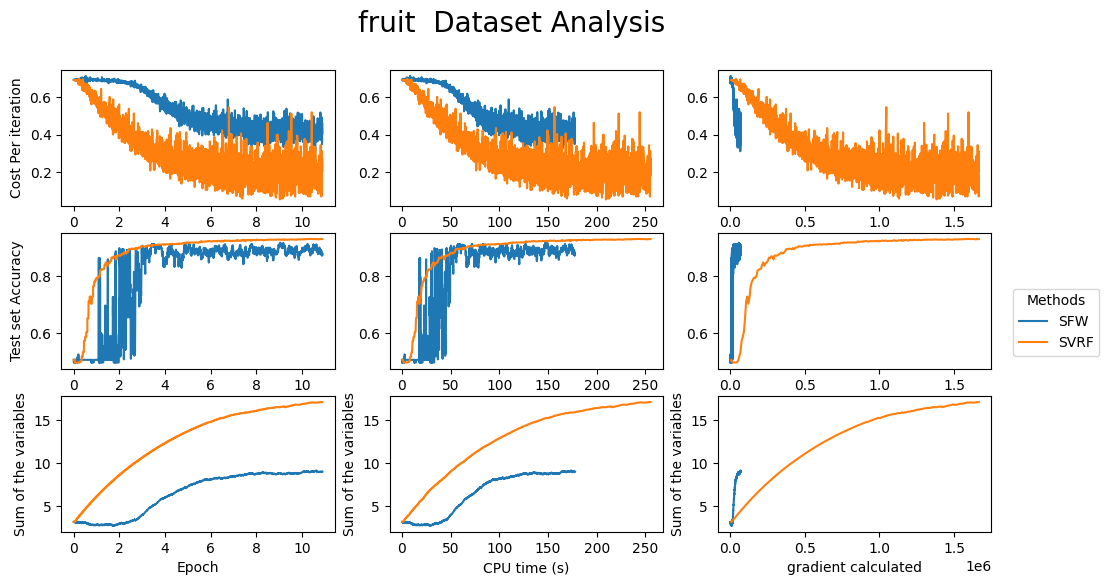

In [ ]:
plt.figure(figsize=(12,6))

labl = []
for i in range(0,len(cost_plot_SFW)):
    labl.append(i/200)

plt.subplot(3, 3, 1)
plt.plot(labl,cost_plot_SFW)
plt.plot(labl,cost_plot_SVRF)
#plt.xticks(X,newlist)
#plt.xticks(labl)


plt.ylabel("Cost Per iteration")

plt.subplot(3, 3, 2)
plt.plot(time_SFW,cost_plot_SFW)
plt.plot(time_SVRF,cost_plot_SVRF)

plt.subplot(3, 3, 3)
plt.plot(gradient_SFW,cost_plot_SFW)
plt.plot(gradient_SVRF,cost_plot_SVRF)




plt.subplot(3, 3, 4)
plt.plot(labl,acc_SFW)
plt.plot(labl, acc_SVRF)
plt.xlabel("Epoch")
plt.ylabel("Test set Accuracy")

plt.subplot(3, 3, 5)
plt.plot(time_SFW,acc_SFW)
plt.plot(time_SVRF,acc_SVRF)

plt.subplot(3, 3, 6)
plt.plot(gradient_SFW,acc_SFW)
plt.plot(gradient_SVRF,acc_SVRF)





plt.subplot(3, 3, 7)
plt.plot(labl,sum_SFW)
plt.plot(labl,sum_SVRF)
plt.xlabel("Epoch")
plt.ylabel("Sum of the variables")


plt.subplot(3, 3, 8)
plt.plot(time_SFW,sum_SFW)
plt.plot(time_SVRF,sum_SVRF)
plt.xlabel("CPU time (s)")
plt.ylabel("Sum of the variables")

plt.subplot(3, 3, 9)
plt.plot(gradient_SFW,sum_SFW)
plt.plot(gradient_SVRF,sum_SVRF)
plt.xlabel("gradient calculated")
plt.ylabel("Sum of the variables")

line_labels = ["SFW", "SVRF"]


# Create the legend
plt.legend(     # The line objects
        labels=line_labels,   # The labels for each line
        borderaxespad=0.1,    # Small spacing around legend box
        title="Methods",  # Title for the legend
        bbox_to_anchor =(1.4, 1.8)
        )
    #    loc="center right",   # Position of legend





plt.suptitle('fruit  Dataset Analysis', size=20)
plt.savefig("fruit plots_updated.png",dpi=300)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a98c5e5-e064-4bec-a807-d852a3976bd8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>